<a href="https://colab.research.google.com/github/danoneeee/uni_works/blob/master/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%9F%D0%A02_%D0%9A%D1%80%D1%8B%D0%BB%D0%BE%D0%B2_%D0%94%D0%B0%D0%BD_%D0%9C%D0%95%D0%92%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
df=pd.read_csv('monster_com-job_sample.csv')
df

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

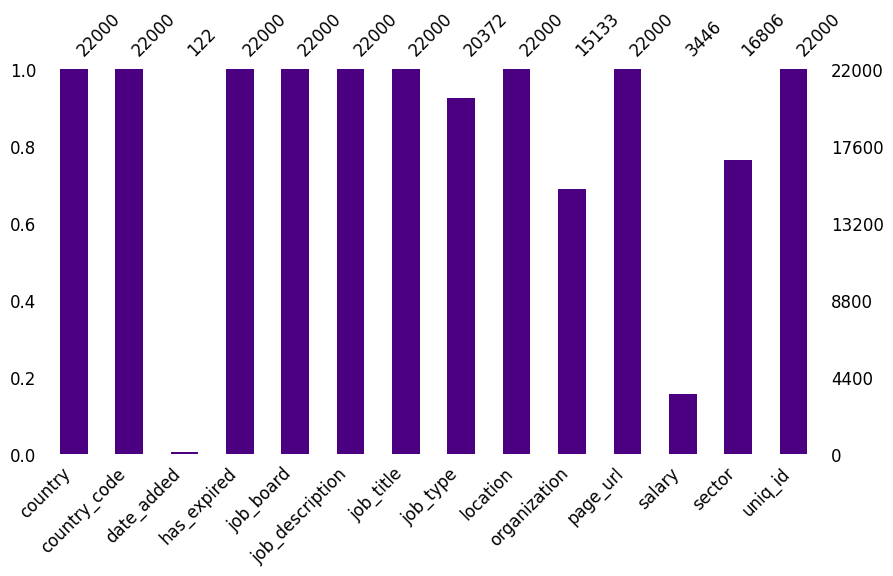

In [ ]:
msno.bar(df, figsize = ( 10 , 5 ),  fontsize = 12, color = "indigo");

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
df_delete_all_Nan = df.dropna ()
df_delete_all_Nan

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
279,United States of America,US,6/10/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Insurance Sales - Customer Service Job in Eden...,Full Time Employee,"Eden Prairie, MN 55344",Insurance,http://jobview.monster.com/insurance-sales-cus...,15.00 - 21.00 $ /hour,Accounting/Finance/Insurance,64a597e5dd17740aadf4b0e8047b51a5
7419,United States of America,US,4/27/2016,No,jobs.monster.com,A CUSTOMER SERVICE JOB … that might become a c...,Customer Service Representative Job in Las Vegas,Full Time Employee,"Las Vegas, NV 89129",Business Services - Other,http://jobview.local-jobs.monster.com/Customer...,$10.50+ /hour,Customer Support/Client Care,7baad80eae733c2518f0a500609c1e90
17048,United States of America,US,8/5/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Licensed Insurance Sales Assistant (Customer S...,Full Time Employee,"Covington, GA",Insurance,http://jobview.monster.com/licensed-insurance-...,$10.50+ /hour,Sales/Retail/Business Development,c486cae7c4c1105a85e50448fb9c0dd0
17052,United States of America,US,8/2/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Customer Service Agent / Insurance Sales Assis...,Full Time Employee,"Alpharetta, GA 30009",Insurance,http://jobview.monster.com/customer-service-ag...,11.00 - 15.00 $ /hour,Sales/Retail/Business Development,6ddfdf91eb991d9d31f3cd2ee4492eb9
18709,United States of America,US,3/11/2016,No,jobs.monster.com,There's No Place Like The Neighborhood!It's a ...,Restaurant Manager - Applebee's Parsippany,"Full Time, Employee","Parsippany, NJ 07054",Restaurant/Food Services,http://jobview.monster.com/Restaurant-Manager-...,50.00 - 65.00 $ /year,Food Services/Hospitality,4fb8c68e3b6efcec902801a96f2cb004


Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

In [ ]:
# 1
name_arr = []
for name in list(df):
  if df[name].nunique() == 1:
    name_arr.append(name)
print("Столбцы с 1 значением:", name_arr)

# 2


# 3
# uniq_id - у нас уже есть 1 уникальный индефикатор

Столбцы с 1 значением: ['country', 'country_code', 'has_expired', 'job_board']


#### Дублирование данных

В данных есть строки с разными айди, но полностью совпадающие по всем другим колонкам.

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

In [ ]:
df_new = df.drop_duplicates(subset=['job_title', 'job_type', 'location', 'organization', 'date_added', 'salary'])
df_new

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
# Сделано выше

In [ ]:
# Удаление нерелевантных столбцов
df_new = df_new.drop('uniq_id', axis= 1, inplace= False)

In [ ]:
# Удаление столбцов с 1 значением
df_new = df_new.drop(['country', 'country_code', 'has_expired', 'job_board'], axis= 1, inplace= False)
df_new

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager)
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management
...,...,...,...,...,...,...,...,...,...
21995,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN
21998,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
l=df.location.unique()
unique_loc={}
for i in range(len(l)):
    unique_loc[i]=l[i]
for k in df.organization.keys():
        if  df.organization[k] in l:
            temp=df.organization[k]
            df.organization[k]=df.location[k]
            df.location[k]=temp
df.head(60)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
5,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),1e2637cb5f7a2c4615a99a26c0566c66
6,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN,455802d725fde67293970ab3953b1d39
7,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7
8,United States of America,US,NaN,No,jobs.monster.com,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,a6a2b5e825b8ce1c3b517adb2497c5ed
9,United States of America,US,NaN,No,jobs.monster.com,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,http://jobview.monster.com/video-data-manageme...,NaN,NaN,73a9ba2b706e02628fa22ca1357174b1


In [ ]:
df['location'].unique()

array(['Madison, WI 53702', 'Madison, WI 53708',
       "DePuy Synthes Companies is a member of Johnson & Johnson's Family of Companies, and is recruiting for a Senior Training Leader located in Raynham, MA.DePuy Synthes Companies of Johnson & Johnson is the largest, most innovative and comprehensive orthopedic and neurological business in the world. DePuy Synthes Companies offer an unparalleled breadth and depth of products, services and programs in the areas of joint reconstruction, trauma, spine, sports medicine, neurological, craniomaxillofacial, power tools and biomaterials. Building on the legacy and strengths of two great companies, more agile and better equipped to meet the needs of today’s evolving health care environment. With a focus on activating insights to develop innovative, comprehensive solutions, we are inspired to advance patient care in greater ways than either company could accomplish on its own.Position Overview• The Training Leader leads the site training functio

На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

город + код + индекс: 10941
город + код: 6177
не соответствующих формату: 2932


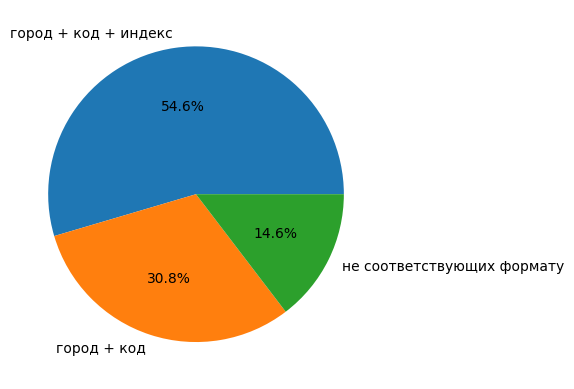

In [ ]:
pattern_city_code_zip = r'.*\,\s+\w{2}\s+\d+$'
pattern_city_code = r'.*\,\s+\w+$'

city_code_zip_count = df_new['location'].str.contains(pattern_city_code_zip).sum()
city_code_count = df_new['location'].str.contains(pattern_city_code).sum()
other_count = len(df_new) - city_code_zip_count - city_code_count

print('город + код + индекс:', city_code_zip_count)
print('город + код:', city_code_count)
print('не соответствующих формату:', other_count)


labels = 'город + код + индекс', 'город + код', 'не соответствующих формату'
sizes = [city_code_zip_count, city_code_count, other_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
df_musor = df_new[~df_new['location'].str.contains(r'.*\,\s+\w{2}\s+\d+$|.*\,\s+\w+$')]
df_musor

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
6,NaN,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN
16,NaN,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Wades...,NaN,Wadesboro 28170,NaN,http://jobview.monster.com/Horizontal-Construc...,NaN,Civil & Structural EngineeringGeneral/Other: E...
22,NaN,We're looking for team players to provide cons...,Combat Engineer - Construction and Engineering...,NaN,La Porte 46350,NaN,http://jobview.monster.com/Combat-Engineer-Con...,NaN,General/Other: Engineering
36,NaN,"POSITION TITLE: RF System Technician, Field Se...",RF System Technician,Full Time Temporary/Contract/Project,"RF System Technician, Field Service","Oklahoma City, OK",http://jobview.monster.com/RF-System-Technicia...,"68,000.00 - 72,000.00 $ /year",Engineering
...,...,...,...,...,...,...,...,...,...
21899,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,Associate Customer Business Manager Location: ...,NaN,http://jobview.monster.com/Associate-Customer-...,NaN,Sales/Retail/Business Development
21933,NaN,"About Us: EMCOR Facilities Services (EFS), an ...",Operations Manager Job in Cincinnati,Full Time Employee,Location:,Construction - Industrial Facilities and Infra...,http://jobview.monster.com/Operations-Manager-...,NaN,Business/Strategic Management
21944,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,Full Time Employee,Maintenance Planner-16150DescriptionLocation: ...,NaN,http://jobview.monster.com/Maintenance-Planner...,NaN,Other
21967,NaN,"About Us: Viox Services, a wholly owned subsid...",General Laborer Job in Cincinnati,Full Time Employee,Location:,All,http://jobview.monster.com/General-Laborer-Job...,NaN,Installation/Maintenance/Repair


In [ ]:
df_cci = df_new[df_new['location'].str.contains(r'.*\,\s+\w{2}\s+\d+$')]
location1=df_cci['location'].str.split(' ')
df_cci['city']=location1.str[0].apply(lambda x: x[:-1])
df_cci['state_code']=location1.str[1]
df_cci['state_index'] = location1.str[2]

df_cci = df_cci.drop(['location'], axis= 1, inplace= False)

<ipython-input-15-2463226d39ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cci['city']=location1.str[0].apply(lambda x: x[:-1])
<ipython-input-15-2463226d39ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cci['state_code']=location1.str[1]
<ipython-input-15-2463226d39ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df_cc = df_new[df_new['location'].str.contains(r'.*\,\s+\w+$')]
location=df_cc['location'].str.split(',')
df_cc['city']=location.str[0]
df_cc['state_code']=location.str[1]

df_cc = df_cc.drop(['location'], axis= 1, inplace= False)

<ipython-input-16-d134be3af241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc['city']=location.str[0]
<ipython-input-16-d134be3af241>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc['state_code']=location.str[1]


In [ ]:
df_new = pd.concat([df_cci, df_cc], axis=0, ignore_index = True)

Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Ячейку, в которую невозможно поместить значение, оставьте пустой.

In [ ]:
pattern_city_index = r'^[A-Za-z\s]+ \d+$'
df_musor1 = df_musor[df_musor['location'].str.contains(pattern_city_index)]

location2=df_musor1['location'].str.rsplit(' ')

df_musor1['city']=location2.str[0]
df_musor1['state_index']=location2.str[1]

df_musor1 = df_musor1.drop(['location'], axis= 1, inplace= False)

df_new1 = pd.concat([df_musor1, df_new], axis=0, ignore_index = True)
df_new1

<ipython-input-18-430f16c7d2d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_musor1['city']=location2.str[0]
<ipython-input-18-430f16c7d2d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_musor1['state_index']=location2.str[1]


,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state_index,state_code
0,NaN,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Wades...,NaN,NaN,http://jobview.monster.com/Horizontal-Construc...,NaN,Civil & Structural EngineeringGeneral/Other: E...,Wadesboro,28170,NaN
1,NaN,We're looking for team players to provide cons...,Combat Engineer - Construction and Engineering...,NaN,NaN,http://jobview.monster.com/Combat-Engineer-Con...,NaN,General/Other: Engineering,La,Porte,NaN
2,NaN,As a Technical Engineer in the Army National G...,Technical Engineer Job in Columbus body { mar...,NaN,NaN,http://jobview.monster.com/Technical-Engineer-...,NaN,Civil & Structural EngineeringGeneral/Other: E...,Columbus,68601,NaN
3,NaN,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Gales...,NaN,NaN,http://jobview.monster.com/Horizontal-Construc...,NaN,Civil & Structural EngineeringGeneral/Other: E...,Galesburg,64101,NaN
4,NaN,As a Technical Engineer in the Army National G...,Technical Engineer Job in Edinburgh body { ma...,NaN,NaN,http://jobview.monster.com/Technical-Engineer-...,NaN,Civil & Structural EngineeringGeneral/Other: E...,Edinburgh,46124,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17457,NaN,B2B Customer Service AssociateAre you customer...,BB Customer Service Associate Job in Cincinnati,Full Time,NaN,http://jobview.monster.com/B2B-Customer-Servic...,"40,000.00 - 42,000.00 $ /yearProfit-sharing",Experienced (Non-Manager),Cincinnati,NaN,OH
17458,NaN,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Full Time,All,http://jobview.monster.com/Journeyman-Electric...,NaN,NaN,Cincinnati,NaN,OH
17459,NaN,Company DescriptionProSource—a total office so...,Help Desk Support Engineer Job in West Chester,Full Time,All,http://jobview.monster.com/Help-Desk-Support-E...,NaN,Experienced (Non-Manager),West Chester,NaN,OH
17460,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH


#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df_new1['salary'].unique()

array([nan, '15.00 - 22.00 $ /hour', '48.00 - 55.00 $ /hour', ...,
       '40,000.00 - 42,000.00 $ /yearProfit-sharing',
       '120,000.00 - 160,000.00 $ /yearbonus',
       '40,000.00 - 46,000.00 $ /year+ annual bonus (up to 15% of salary)'],
      dtype=object)

У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

In [ ]:
df_Nan = df_new1[df_new1['salary'].isna()]
df_no_Nan = df_new1.dropna(subset=['salary'])

d_d_hour_pattern = r'^\$?\d{1,9}\.\d{1,9}\s?-\s?\d{1,9}\.\d{1,9}\s?\$?\/hour$'
df_d_d_hour = df_no_Nan[df_no_Nan['salary'].str.contains(d_d_hour_pattern)]
df_d_d_hour[['from', 'to', 'time_int']] = df_d_d_hour['salary'].str.split('- | /').apply(pd.Series)
df_d_d_hour['type'] = 'from-to'

d_d_year_pattern = r'^\$?\d{1,9}(,\d{1,9})*\.\d{1,9}\s?-\s?\d{1,9}(,\d{1,9})*\.\d{1,9}\s?\$?\/year$'
df_d_d_year = df_no_Nan[df_no_Nan['salary'].str.contains(d_d_year_pattern)]
df_d_d_year[['from', 'to', 'time_int']] = df_d_d_year['salary'].str.split('- | /').apply(pd.Series)
df_d_d_year['type'] = 'from-to'

d_hour_pattern = r'^\$?\d{1,9}\.\d{1,9}\s?\+?\s?\$?\/hour$'
df_d_hour = df_no_Nan[df_no_Nan['salary'].str.contains(d_hour_pattern)]
df_d_hour["from"] = df_d_hour["salary"].str.extract(r"(\d+\,?\.?\d+)")[0]
df_d_hour['time_int'] = 'hour'
df_d_hour['type'] = 'from'

d_year_pattern = r'^\$\d{1,9}(,\d{1,9})*\.\d{1,9}\s?\+\s?\/year$'
df_d_year = df_no_Nan[df_no_Nan['salary'].str.contains(d_year_pattern)]
df_d_year["from"] = df_d_year["salary"].str.extract(r"(\d+\,?\.?\d+)")[0]
df_d_year['time_int'] = 'year'
df_d_year['type'] = 'from'

upto_d_pattern = r'^[uU]p to?\s?\$?\s?\d{1,9}(,\d{1,9})*\.\d{1,9}$'
df_upto_d = df_no_Nan[df_no_Nan['salary'].str.contains(upto_d_pattern)]

df_upto_hour = df_upto_d[df_upto_d['salary'].str.extract(r'(\d+\,?\.?\d+)')[0].astype(float) < 100]
df_upto_hour["to"] = df_upto_hour["salary"].str.extract(r"(\d+\,?\.?\d+)")[0]
df_upto_hour['type'] = 'to'

df_upto_year = df_upto_d[df_upto_d['salary'].str.extract(r'\$([\d,]+)\.\d+')[0].astype(float) >= 100]
df_upto_year["to"] = df_upto_year["salary"].str.extract(r"(\d+\,?\.?\d+)")[0]
df_upto_year['type'] = 'to'

df_d_d_hour

<ipython-input-20-1c27e16e639b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_d_hour[['from', 'to', 'time_int']] = df_d_d_hour['salary'].str.split('- | /').apply(pd.Series)
<ipython-input-20-1c27e16e639b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_d_hour[['from', 'to', 'time_int']] = df_d_d_hour['salary'].str.split('- | /').apply(pd.Series)
<ipython-input-20-1c27e16e639b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state_index,state_code,from,to,time_int,type
4856,NaN,Classification:Non-ExemptRevised:05/14/2014Job...,Counter-Sorter Job in Kent,Employee,Other/Not Classified,http://jobview.monster.com/Counter-Sorter-Job-...,10.66 - 12.54 /hour,Entry Level,Kent,98032,WA,10.66,12.54,hour,from-to
11505,NaN,Administrative AssistantAdministrative Assista...,Administrative Assistant Job in Dallas,"Full Time, Employee",Legal Services,http://jobview.monster.com/administrative-assi...,16.00 - 17.00 /hour,Administrative/Clerical,Dallas,NaN,TX,16.00,17.00,hour,from-to
11589,NaN,Accounts Receivable - Reconciliations Speciali...,Accounts Receivable - Reconciliations Speciali...,"Full Time, Employee",Accounting and Auditing Services,http://jobview.monster.com/accounts-receivable...,17.00 - 19.00 /hour,Accounting/Finance/Insurance,Dallas,NaN,TX,17.00,19.00,hour,from-to
11615,NaN,Customer Service RepresentativeOur client loca...,Customer Service Representative Job in Dallas,"Full Time, Employee",Other/Not Classified,http://jobview.monster.com/customer-service-re...,13.00 - 15.00 /hour,Customer Support/Client Care,Dallas,NaN,TX,13.00,15.00,hour,from-to
13084,NaN,SolidWorks drafting opportunity for a Contract...,Contract Drafter Job in Dallas,"Full Time, Employee",Manufacturing - Other,http://jobview.monster.com/Contract-Drafter-Jo...,30.00 - 32.00 /hour,Engineering,Dallas,NaN,TX,30.00,32.00,hour,from-to
13928,NaN,POSITION Machine Operator 1st Shif...,Machine Operator st shift and nd Shift Job in ...,Full Time Employee,Manufacturing - Other,http://jobview.monster.com/Machine-Operator-1s...,11.50 - 12.00 /hour,Manufacturing/Production/Operations,Lincolton,NaN,NC,11.50,12.00,hour,from-to
14298,NaN,Prestige Staffing is seeking a Mammography Tec...,Mammographer Job in Marietta,Full Time Employee,Healthcare Services,http://jobview.monster.com/mammographer-job-ma...,31.00 - 35.00 /hour,Medical/Health,Marietta,NaN,GA,31.00,35.00,hour,from-to
16114,NaN,Frontline Source Group has an outstanding oppo...,IT Assistant Job in Oklahoma City,"Full Time, Employee",Computer/IT Services,http://jobview.monster.com/it-assistant-job-ok...,17.00 - 21.00 /hour,IT/Software Development,Oklahoma City,NaN,OK,17.00,21.00,hour,from-to
16210,NaN,Administrative AssistantNon-profit organizatio...,Administrative Assistant Job in Dallas,"Full Time, Employee",Nonprofit Charitable Organizations,http://jobview.monster.com/Administrative-Assi...,16.00 - 21.00 /hour,Administrative/Clerical,Dallas,NaN,TX,16.00,21.00,hour,from-to
16318,NaN,Administrative Assistant Well established Gene...,Administrative Assistant Job in Dallas,"Full Time, Employee",Construction - Residential & Commercial/Office,http://jobview.monster.com/Administrative-Assi...,15.00 - 17.00 /hour,Administrative/Clerical,Dallas,NaN,TX,15.00,17.00,hour,from-to


Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

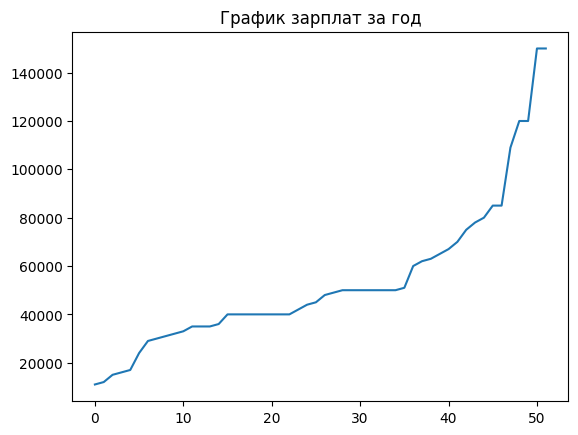

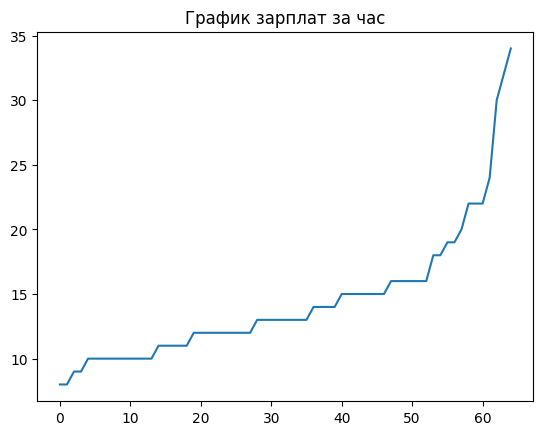

Минимальна зрплата за год  -- 11000 $
Максимальна зрплата за час -- 34 $


In [ ]:
year_digits = []
year_strings = df_d_year['salary'].tolist()
for i in year_strings:
  numbers = re.findall(r'\b\d+\b', i)
  year_digits.append(int(numbers[0])*1000)

hour_digits = []
hour_strings = df_d_hour['salary'].tolist()

for i in hour_strings:
  numbers = re.findall(r'\b\d+\b', i)
  hour_digits.append(int(numbers[0]))

year_digits.sort()
hour_digits.sort()

plt.figure(1)
plt.plot(year_digits)
plt.title('График зарплат за год')

plt.figure(2)
plt.plot(hour_digits)
plt.title('График зарплат за час')

plt.show()

print('Минимальна зрплата за год  --', min(year_digits),'$')
print('Максимальна зрплата за час --', max(hour_digits),'$')

Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

In [ ]:
# все что больше 10000$ это за год
# все что меньше 35$ это за час

**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

In [ ]:
df_month = df_no_Nan[df_no_Nan['salary'].str.contains(r'/month')]
df_month[['from', 'to', 'time_int']] = df_month['salary'].str.split('- | /').apply(pd.Series)
df_month['to'] = df_month['to'].apply(lambda x: x[:-1])
df_month['type'] = 'from-to'

df_week = df_no_Nan[df_no_Nan['salary'].str.contains(r'/week')]
df_week_from = df_week[df_week['salary'].str.contains(r'\+')]
df_week_from["from"] = df_week_from["salary"].str.extract(r"(\d+\,?\.?\d+)")[0]
df_week_from['time_int'] = 'week'
df_week_from['type'] = 'from'

df_week = df_no_Nan[df_no_Nan['salary'].str.contains(r'/week')]
df_week_ft = df_week[df_week['salary'].str.contains(r'\$ /week')]
df_week_ft[['from', 'to', 'time_int']] = df_week_ft['salary'].str.split('- | /').apply(pd.Series)
df_week_ft['to'] = df_week_ft['to'].apply(lambda x: x[:-1])
df_week_ft['type'] = 'from-to'

df_new2 = pd.concat([df_month, df_week_from, df_week_ft, df_d_d_hour, df_d_d_year, df_d_hour, df_d_year, df_upto_hour, df_upto_year, df_Nan], axis=0, ignore_index = True)

df_new2

<ipython-input-23-c65d0e65d7d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month[['from', 'to', 'time_int']] = df_month['salary'].str.split('- | /').apply(pd.Series)
<ipython-input-23-c65d0e65d7d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month[['from', 'to', 'time_int']] = df_month['salary'].str.split('- | /').apply(pd.Series)
<ipython-input-23-c65d0e65d7d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state_index,state_code,from,to,time_int,type
0,NaN,Job Description:Psychiatrist III - Starting Sa...,Staff Psychiatrist Job in Corpus Christi,Full Time,NaN,http://jobview.monster.com/Staff-Psychiatrist-...,"17,688.94 - 20,971.00 $ /month",Manager (Manager/Supervisor of Staff),Corpu,TX,"Christi,","17,688.94","20,971.00",month,from-to
1,NaN,Job Description:Licensed Vocational Nurse II -...,Licensed Vocational Nurse II-Group Home Job in...,Full Time,NaN,http://jobview.monster.com/Licensed-Vocational...,"3,137.89 - 3,865.66 $ /month",Experienced (Non-Manager),Corpu,TX,"Christi,","3,137.89","3,865.66",month,from-to
2,NaN,Job Description:Psychiatrist III - Starting Sa...,Lead Psychiatrist Job in Corpus Christi,Full Time,NaN,http://jobview.monster.com/Lead-Psychiatrist-J...,"17,688.94 - 20,971.00 $ /month",Manager (Manager/Supervisor of Staff),Corpu,TX,"Christi,","17,688.94","20,971.00",month,from-to
3,NaN,Job Description:Registered Therapist IV Audiol...,Audiologist Job in Corpus Christi,Full Time,NaN,http://jobview.monster.com/Audiologist-Job-Cor...,"6,833.33 - 8,060.00 $ /month",Experienced (Non-Manager),Corpu,TX,"Christi,","6,833.33","8,060.00",month,from-to
4,NaN,Job Description:Nurse III Under the direct sup...,Nurse III Job in Corpus Christi,Full Time,NaN,http://jobview.monster.com/Nurse-III-Job-Corpu...,"4,224.31 - 6,579.41 $ /month",Experienced (Non-Manager),Corpu,TX,"Christi,","4,224.31","6,579.41",month,from-to
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,NaN,One-Time Bonus You will receive a one-time bon...,Retail Sales Consultant Cincinnati OH (Cincinn...,NaN,NaN,http://jobview.monster.com/Retail-Sales-Consul...,NaN,NaN,Milford,NaN,OH,NaN,NaN,NaN,NaN
14591,NaN,Security Officer Aegis Protective Services is ...,Security Officer Job in West Chester,Full Time,All,http://jobview.local-jobs.monster.com/Security...,NaN,Entry Level,West Chester,NaN,OH,NaN,NaN,NaN,NaN
14592,NaN,The leader in healthcare education program man...,Site Director - Xavier University Job in Cinci...,Full Time,Education,http://jobview.monster.com/Site-Director-Xavie...,NaN,NaN,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN
14593,NaN,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Full Time,All,http://jobview.monster.com/Journeyman-Electric...,NaN,NaN,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN


#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df_new2['job_type'].unique()

array(['Full Time', 'Full Time, Employee', 'Part Time',
       'Part Time Employee', 'Employee', 'Full Time Employee',
       'Job Type Employee', 'Full Time Temporary/Contract/Project',
       'Job Type Full Time Employee',
       'Full Time, Temporary/Contract/Project',
       'Temporary/Contract/Project', nan, 'Full Time , Employee',
       'Full Time , Temporary/Contract/Project', 'Full Time Intern',
       'Full Time / Employee', 'Part Time, Employee', 'Per Diem',
       'Per Diem Employee', 'Per Diem, Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Part Time Seasonal',
       'Part Time , Employee', 'Job Type Full Time', 'Part Time Intern',
       'Per Diem, Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project',
       'Job Type Part Time Employee', 'Full Time\xa0 Employee',
       'Part Time, Intern', 'Part Time / Employee'], dtype=object)

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
df_new2['job_type'] = df_new2['job_type']. fillna ('Full Time, Employee')

df_PT = df_new2[df_new2['job_type'].str.contains('Part Time', na=False)]
df_PT_emp = df_PT[df_PT['job_type'].str.contains('Employee', na=False)]
df_PT_emp['job_time'] = 'Part Time'
df_PT_emp['job_status'] = 'Employee'

df_PT_tcp = df_PT[df_PT['job_type'].str.contains('Temporary/Contract/Project', na=False)]
df_PT_tcp['job_time'] = 'Part Time'
df_PT_tcp['job_status'] = 'Temporary/Contract/Project'

df_PT_int = df_PT[df_PT['job_type'].str.contains('Intern', na=False)]
df_PT_int['job_time'] = 'Part Time'
df_PT_int['job_status'] = 'Intern'

df_perd = df_new2[df_new2['job_type'].str.contains('Per Diem', na=False)]
df_perd_emp = df_perd[df_perd['job_type'].str.contains('Employee', na=False)]
df_perd_emp['job_time'] = 'Per Diem'
df_perd_emp['job_status'] = 'Employee'

df_perd_tcp = df_perd[df_perd['job_type'].str.contains('Temporary/Contract/Project', na=False)]
df_perd_tcp['job_time'] = 'Per Diem'
df_perd_tcp['job_status'] = 'Temporary/Contract/Project'

df_FT = df_new2[df_new2['job_type'].str.contains('Full Time', na=False)]
df_FT_emp = df_FT[df_FT['job_type'].str.contains('Employee', na=False)]
df_FT_emp['job_time'] = 'Full Time'
df_FT_emp['job_status'] = 'Employee'

df_FT_tcp = df_FT[df_FT['job_type'].str.contains('Temporary/Contract/Project', na=False)]
df_FT_tcp['job_time'] = 'Full Time'
df_FT_tcp['job_status'] = 'Temporary/Contract/Project'

df_FT_int = df_FT[df_FT['job_type'].str.contains('Intern', na=False)]
df_FT_int['job_time'] = 'Full Time'
df_FT_int['job_status'] = 'Intern'


df_no_jt = df_new2[~df_new2['job_type'].str.contains('Full Time|Part Time|Per Diem', na=False)]
df_no_jt['job_time'] = 'Full Time'
df_no_jt['job_status'] = df_no_jt['job_type']


df_no_js = df_new2[~df_new2['job_type'].str.contains('Employee|Intern|Temporary/Contract/Project', na=False)]
df_no_js['job_time'] = df_no_js['job_type']
df_no_js['job_status'] = 'Employee'


df_new3 = pd.concat([df_PT_emp, df_PT_int, df_PT_tcp, df_perd_tcp, df_perd_emp, df_FT_emp, df_FT_int, df_FT_int, df_no_jt, df_no_js], axis=0, ignore_index = True)
df_new3 = df_new3.drop('job_type', axis = 1)
df_new3

<ipython-input-40-2fe8a72ea302>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PT_emp['job_time'] = 'Part Time'
<ipython-input-40-2fe8a72ea302>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PT_emp['job_status'] = 'Employee'
<ipython-input-40-2fe8a72ea302>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,date_added,job_description,job_title,organization,page_url,salary,sector,city,state_index,state_code,from,to,time_int,type,job_time,job_status
0,NaN,The Shipping Clerk is responsible for ensuring...,Shipping Clerk Job in Chicago,NaN,http://jobview.monster.com/shipping-clerk-job-...,"1,800.00 - 3,500.00 $ /month",Logistics/Transportation,Chicago,NaN,IL,"1,800.00","3,500.00",month,from-to,Part Time,Employee
1,NaN,In addition to our generous benefits package A...,Certified Nursing Assistant Job in Armstrong,Healthcare Services,http://jobview.monster.com/Certified-Nursing-A...,$12.00+ /hour,Medical/Health,Armstrong,50514,IA,12.00,NaN,hour,from,Part Time,Employee
2,NaN,Water's Edge Health Care at Sandhill Cove has...,Dietary Server Job in Palm City,NaN,http://jobview.monster.com/Dietary-Server-Job-...,$10.00+ /hour,Food Services/Hospitality,Pal,FL,"City,",10.00,NaN,hour,from,Part Time,Employee
3,NaN,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,Austin,78746,TX,NaN,NaN,NaN,NaN,Part Time,Employee
4,NaN,The Customer Service Representative (CSR) is r...,Customer Service Representative (Part-Time) / ...,"Travel, Transportation and Tourism",http://jobview.monster.com/Customer-Service-Re...,NaN,Customer Support/Client Care,Lansing,48911,MI,NaN,NaN,NaN,NaN,Part Time,Employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,NaN,DRIVER TRAINEES-25 NEEDED NOW!Become a driver ...,Driver Trainee Job in Cincinnati,All,http://jobview.local-jobs.monster.com/Driver-T...,NaN,Entry Level,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee
13667,NaN,Security Officer Aegis Protective Services is ...,Security Officer Job in West Chester,All,http://jobview.local-jobs.monster.com/Security...,NaN,Entry Level,West Chester,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee
13668,NaN,The leader in healthcare education program man...,Site Director - Xavier University Job in Cinci...,Education,http://jobview.monster.com/Site-Director-Xavie...,NaN,NaN,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee
13669,NaN,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,All,http://jobview.monster.com/Journeyman-Electric...,NaN,NaN,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee


Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

In [ ]:
def clean_text(text):
    text = text.lower()
    regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
    text = re.sub(regular, '', text)
    return text


cleaned_text = []
for text in df_new3['organization']:
    text = clean_text(str(text))
    cleaned_text.append(text)
cleaned_text1 = []
for text in df_new3['sector']:
    text = clean_text(str(text))
    cleaned_text1.append(text)
df_new3['organization_new'] = cleaned_text
df_new3['sector_new'] = cleaned_text1
df_new3 = df_new3.drop(['organization', 'sector', 'page_url', 'salary'], axis = 1)
df_new3

,date_added,job_description,job_title,city,state_index,state_code,from,to,time_int,type,job_time,job_status,organization_new,sector_new
0,NaN,The Shipping Clerk is responsible for ensuring...,Shipping Clerk Job in Chicago,Chicago,NaN,IL,"1,800.00","3,500.00",month,from-to,Part Time,Employee,nan,logisticstransportation
1,NaN,In addition to our generous benefits package A...,Certified Nursing Assistant Job in Armstrong,Armstrong,50514,IA,12.00,NaN,hour,from,Part Time,Employee,healthcare services,medicalhealth
2,NaN,Water's Edge Health Care at Sandhill Cove has...,Dietary Server Job in Palm City,Pal,FL,"City,",10.00,NaN,hour,from,Part Time,Employee,nan,food serviceshospitality
3,NaN,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Austin,78746,TX,NaN,NaN,NaN,NaN,Part Time,Employee,hotels and lodging personal and household serv...,customer supportclient care
4,NaN,The Customer Service Representative (CSR) is r...,Customer Service Representative (Part-Time) / ...,Lansing,48911,MI,NaN,NaN,NaN,NaN,Part Time,Employee,travel transportation and tourism,customer supportclient care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,NaN,DRIVER TRAINEES-25 NEEDED NOW!Become a driver ...,Driver Trainee Job in Cincinnati,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,all,entry level
13667,NaN,Security Officer Aegis Protective Services is ...,Security Officer Job in West Chester,West Chester,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,all,entry level
13668,NaN,The leader in healthcare education program man...,Site Director - Xavier University Job in Cinci...,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,education,nan
13669,NaN,Ohio based electrical contractor is seeking ex...,Journeyman Electrician Job in Cincinnati,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,all,nan


In [ ]:
df_new3['job_title'] = df_new3['job_title'].apply(lambda x: x.split(' in ')[0].strip())
df_new3['job_title'] = df_new3['job_title'].str.replace(r'\bJob\b$', '', regex=True)
df_new3['sector_new'] = df_new3['sector_new'].apply(lambda x: x if len(str(x)) <= 150 else None)
df_new3

# убираем упоминания городов и лишних слов в стобце job_title и удаление нерелевантных строк в столбце sector_new

,date_added,job_description,job_title,city,state_index,state_code,from,to,time_int,type,job_time,job_status,organization_new,sector_new
0,NaN,The Shipping Clerk is responsible for ensuring...,Shipping Clerk,Chicago,NaN,IL,"1,800.00","3,500.00",month,from-to,Part Time,Employee,nan,logisticstransportation
1,NaN,In addition to our generous benefits package A...,Certified Nursing Assistant,Armstrong,50514,IA,12.00,NaN,hour,from,Part Time,Employee,healthcare services,medicalhealth
2,NaN,Water's Edge Health Care at Sandhill Cove has...,Dietary Server,Pal,FL,"City,",10.00,NaN,hour,from,Part Time,Employee,nan,food serviceshospitality
3,NaN,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper,Austin,78746,TX,NaN,NaN,NaN,NaN,Part Time,Employee,hotels and lodging personal and household serv...,customer supportclient care
4,NaN,The Customer Service Representative (CSR) is r...,Customer Service Representative (Part-Time) / CSR,Lansing,48911,MI,NaN,NaN,NaN,NaN,Part Time,Employee,travel transportation and tourism,customer supportclient care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,NaN,DRIVER TRAINEES-25 NEEDED NOW!Become a driver ...,Driver Trainee,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,all,entry level
13667,NaN,Security Officer Aegis Protective Services is ...,Security Officer,West Chester,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,all,entry level
13668,NaN,The leader in healthcare education program man...,Site Director - Xavier University,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,education,nan
13669,NaN,Ohio based electrical contractor is seeking ex...,Journeyman Electrician,Cincinnati,NaN,OH,NaN,NaN,NaN,NaN,Full Time,Employee,all,nan


### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных.
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

In [ ]:
df_new3.info()
df_new3['job_title'].unique()
df_new3['sector_new'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13671 entries, 0 to 13670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date_added        114 non-null    object
 1   job_description   13671 non-null  object
 2   job_title         13671 non-null  object
 3   city              13671 non-null  object
 4   state_index       8367 non-null   object
 5   state_code        13370 non-null  object
 6   from              188 non-null    object
 7   to                157 non-null    object
 8   time_int          188 non-null    object
 9   type              273 non-null    object
 10  job_time          13671 non-null  object
 11  job_status        13671 non-null  object
 12  organization_new  13671 non-null  object
 13  sector_new        13663 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


array(['logisticstransportation', 'medicalhealth',
       'food serviceshospitality', 'customer supportclient care',
       'securityprotective services', 'itsoftware development',
       'salesretailbusiness development', 'marketingproduct',
       'installationmaintenancerepair', 'human resources', 'nan',
       'educationtraining', 'manufacturingproductionoperations',
       'bankingreal estatemortgage professionals',
       'accountingfinanceinsurance', 'businessstrategic management',
       'administrativeclerical', 'equipment operations',
       'experienced nonmanager', 'career level experienced nonmanager',
       'administrative supportoffice managementgeneralother administrativeclerical',
       'nursinggeneralother medicalhealth', 'generalother medicalhealth',
       'editorialwriting', 'building constructionskilled trades',
       'retail', 'projectprogram management', 'entry level',
       'biotechrdscience', 'engineering', 'quality assurancesafety',
       'generalother l

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


Таким образом, потеряно немного строк, но при этом улучшены практически все столбцы, особенно job_type, location, salary. Теперь данные более понятны и читаемы, с ними легче выполнять задачи.Текущего состояния достаточно, можно выполнить подсчет полноты занятости, подсчет типа занятости (например, посчитать сколько людей работают на Full Time и тд), также составлять статистику для определенного города (например, сколько работ в определенном городе) и так далее